In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # อ่านข้อมูลจากไฟล์ CSV
# df = pd.read_csv('province/export-jsps014-1h.csv')

# # กำหนดเกณฑ์สำหรับค่า pm_10
# df = df[(df['pm_10'] >= 0) & (df['pm_10'] <= 80)]

# # ตั้งค่าแกน x และ y
# x = df['timestamp']
# y_columns = ['humidity', 'pm_10', 'pm_2_5', 'temperature']

# # พลอตกราฟเส้นที่มีจุด
# plt.figure(figsize=(10, 6))
# for column in y_columns:
#     plt.plot(x, df[column], marker='o', label=column)

# # ตั้งค่าชื่อแกนและชื่อกราฟ
# plt.xlabel('Date')
# plt.ylabel('Values')
# plt.title('Time Series Data')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

# # แสดงกราฟ
# plt.show()
# print(df.duplicated().sum())

In [ ]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('province/export-jsps014-1h.csv', parse_dates=['timestamp'], index_col='timestamp')

# ลบคอลัมน์ที่ไม่มีชื่อ (Unnamed)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# ตั้งค่าความถี่เป็นรายชั่วโมง
df = df.asfreq('H')

# ตรวจสอบข้อมูลที่ขาดหายไป
missing_data = df[df.isnull().any(axis=1)]
print("Missing data:")
print(missing_data)

# แยกคอลัมน์ที่เป็นประเภท object ออกมาก่อน
df_objects = df.select_dtypes(include=['object'])
df_numeric = df.select_dtypes(exclude=['object'])

# เติมข้อมูลที่ขาดหายไปในคอลัมน์ที่เป็นตัวเลขด้วยการ interpolate
df_numeric_interpolated = df_numeric.interpolate()

# เติมข้อมูลที่ขาดหายไปในคอลัมน์ที่เป็นประเภท object ด้วยการ forward fill และ backward fill
df_objects_filled = df_objects.fillna(method='ffill').fillna(method='bfill')

# รวมข้อมูลกลับเข้าด้วยกัน
df_interpolated = pd.concat([df_numeric_interpolated, df_objects_filled], axis=1)

# ตรวจสอบข้อมูลที่ขาดหายไปอีกครั้งหลังจากการ interpolate
missing_data_after_interpolating = df_interpolated[df_interpolated.isnull().any(axis=1)]
print("Missing data after interpolating:")
print(missing_data_after_interpolating)

# ตรวจสอบว่ามีข้อมูลครบ 24 ชั่วโมงทุกวันหรือไม่
df_interpolated['date'] = df_interpolated.index.date
hourly_counts = df_interpolated.groupby('date').size()
incomplete_days = hourly_counts[hourly_counts != 24]
print("Days with incomplete data:")
print(incomplete_days)

# แสดงข้อมูลที่ clean แล้ว
print("Cleaned data:")
print(df_interpolated.head())

# ลบคอลัมน์ date ที่เพิ่มเข้ามา
df_interpolated = df_interpolated.drop(columns=['date'])

# บันทึกข้อมูลที่ clean แล้วลงไฟล์ใหม่
df_interpolated.to_csv('province/export-jsps014-1h_cleaned.csv')

Missing data:
                    timezone  humidity  pm_2_5  pm_2_5_sp  temperature  \
timestamp                                                                
2022-03-17 19:00:00      NaN       NaN     NaN        NaN          NaN   
2022-03-17 20:00:00      NaN       NaN     NaN        NaN          NaN   
2022-03-17 21:00:00      NaN       NaN     NaN        NaN          NaN   
2022-03-17 22:00:00      NaN       NaN     NaN        NaN          NaN   
2022-03-17 23:00:00      NaN       NaN     NaN        NaN          NaN   
...                      ...       ...     ...        ...          ...   
2025-02-11 07:00:00      NaN       NaN     NaN        NaN          NaN   
2025-02-11 08:00:00      NaN       NaN     NaN        NaN          NaN   
2025-02-11 09:00:00      NaN       NaN     NaN        NaN          NaN   
2025-02-11 10:00:00      NaN       NaN     NaN        NaN          NaN   
2025-02-11 11:00:00      NaN       NaN     NaN        NaN          NaN   

                    loc

/var/folders/x_/lq083y1j115fh3cygnc627p00000gn/T/ipykernel_24523/346699059.py:18: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


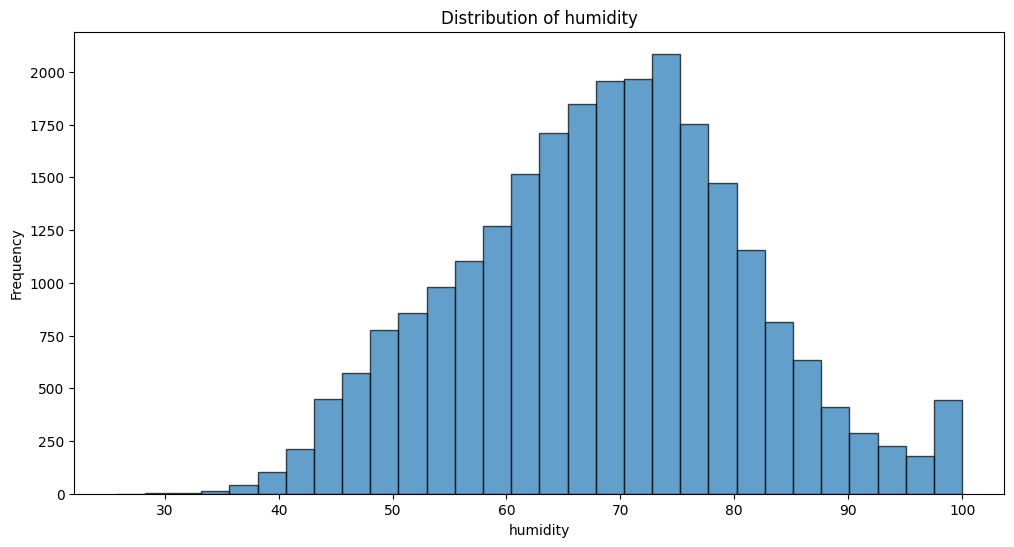

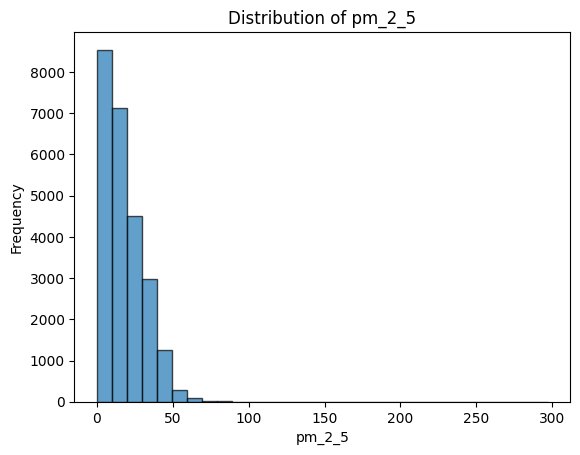

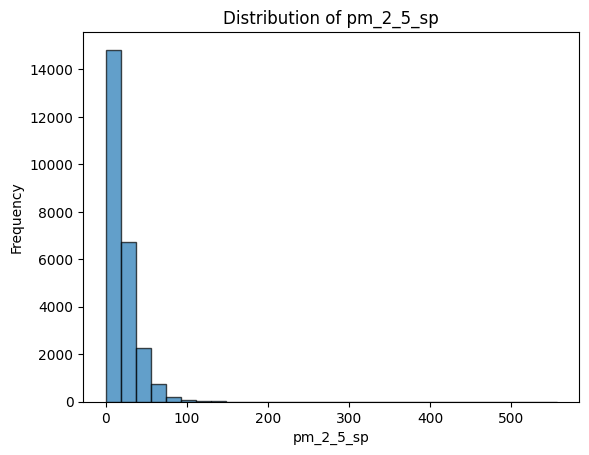

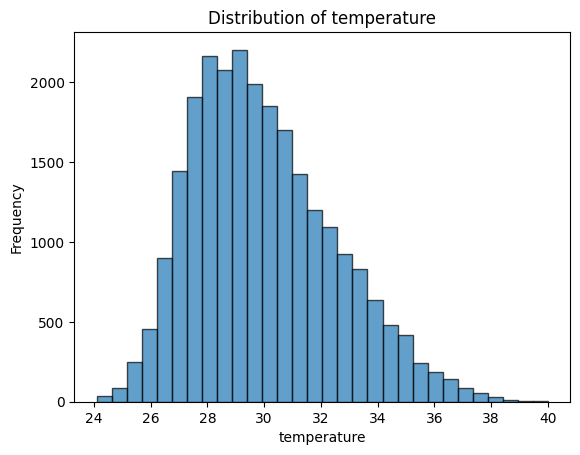

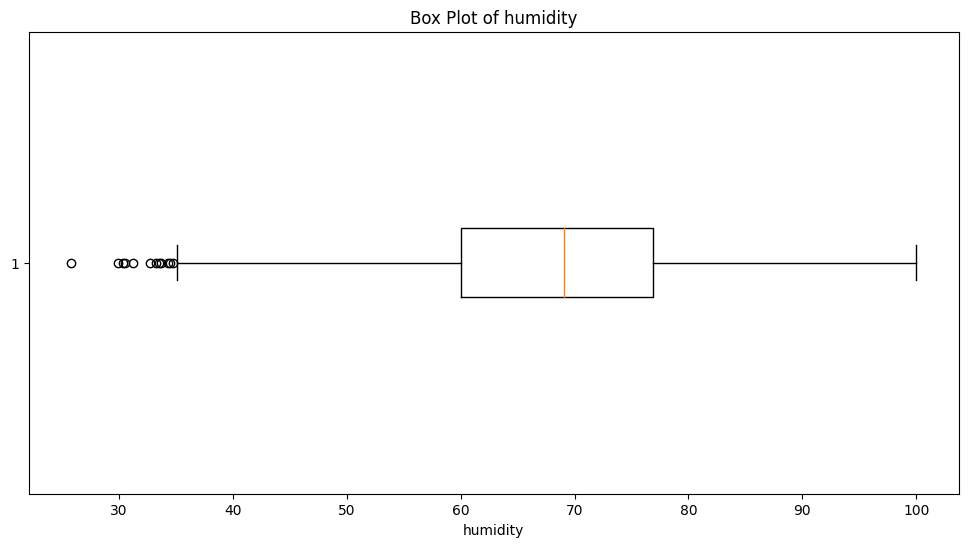

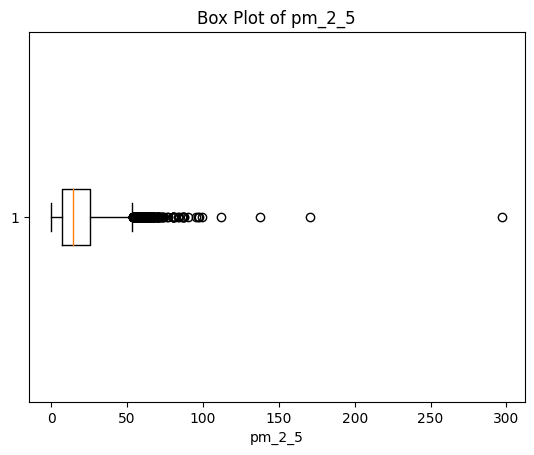

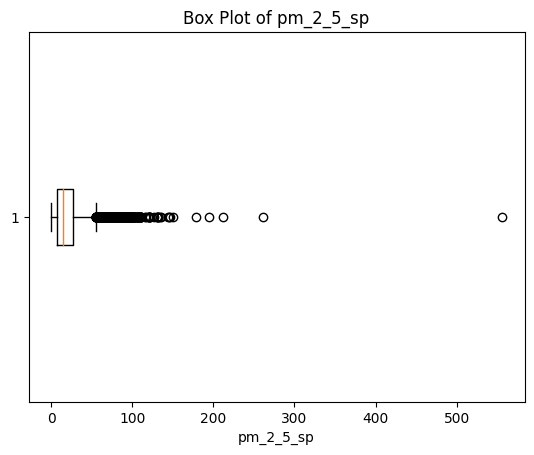

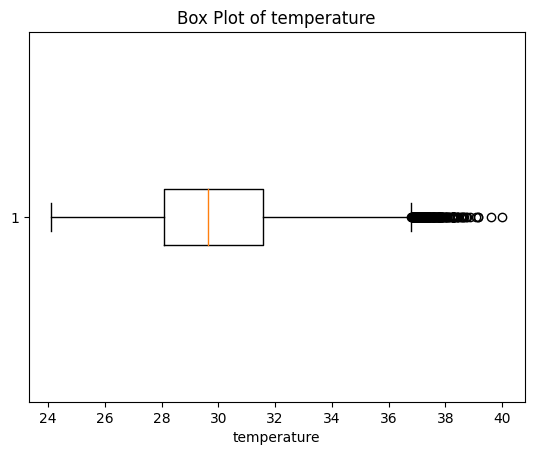

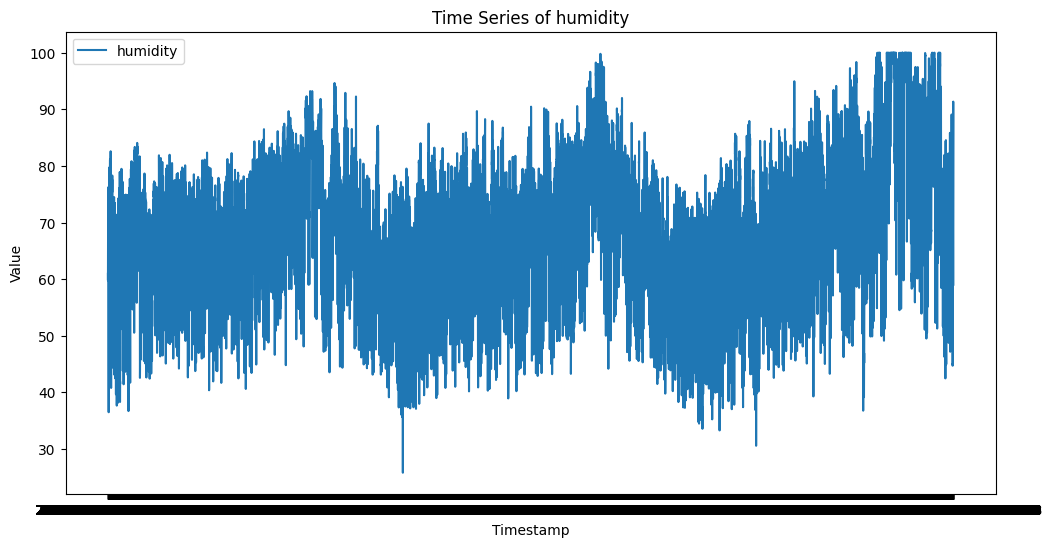

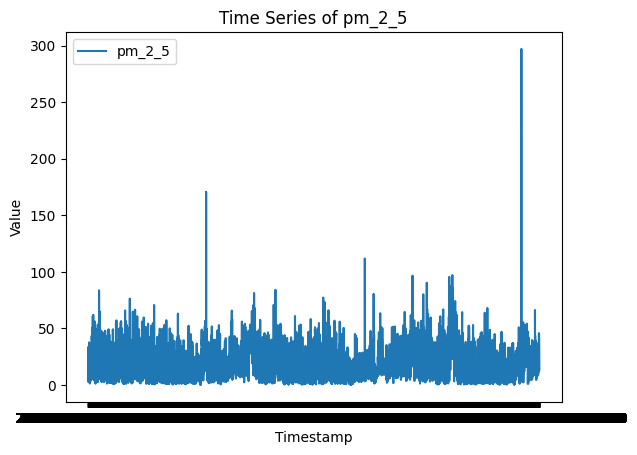

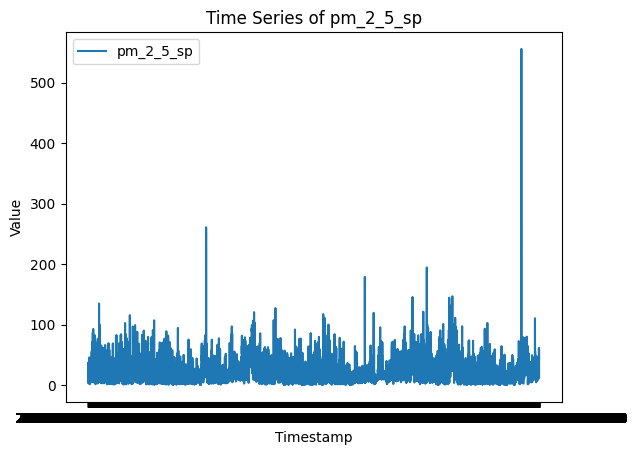

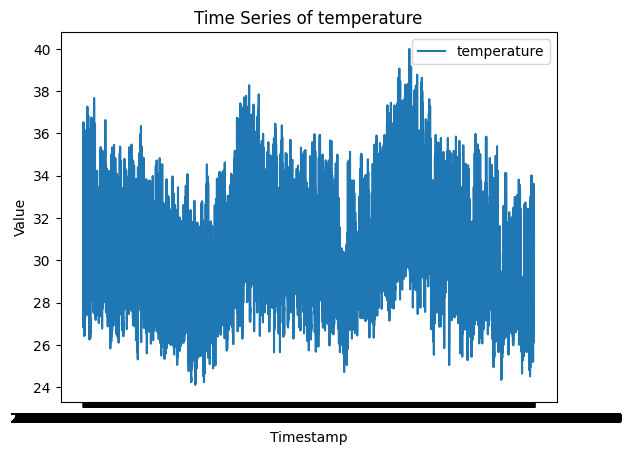

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('province/export-jsps014-1h.csv', parse_dates=['timestamp'], index_col='timestamp')

# ลบคอลัมน์ที่ไม่มีชื่อ (Unnamed)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# แยกคอลัมน์ที่เป็นตัวเลข
df_numeric = df.select_dtypes(exclude=['object'])

# พล็อตกราฟกระจายตัว (Histogram) ด้วย matplotlib
plt.figure(figsize=(12, 6))
for column in df_numeric.columns:
    plt.hist(df_numeric[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# พล็อต Box Plot เพื่อตรวจสอบ outliers ด้วย matplotlib
plt.figure(figsize=(12, 6))
for column in df_numeric.columns:
    plt.boxplot(df_numeric[column].dropna(), vert=False)  # vert=False เพื่อให้กราฟเป็นแนวนอน
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# พล็อตกราฟเส้น (Line Plot) สำหรับข้อมูล time series
plt.figure(figsize=(12, 6))
for column in df_numeric.columns:
    plt.plot(df_numeric.index, df_numeric[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

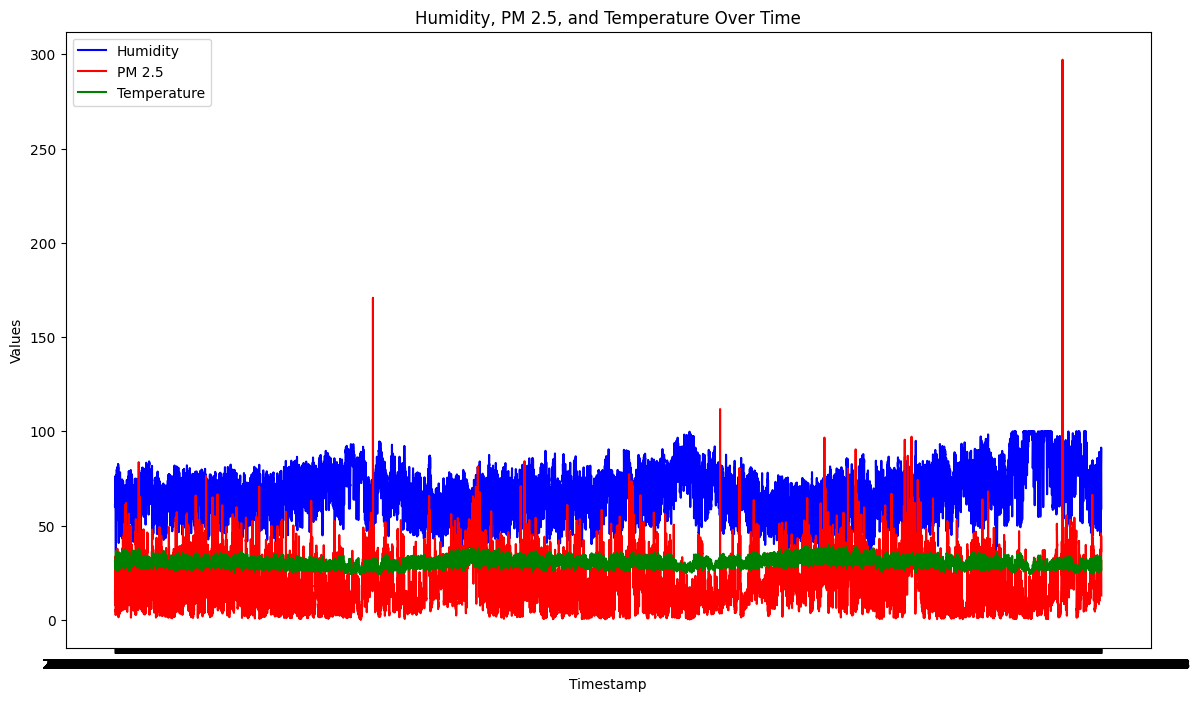

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('province/export-jsps014-1h.csv')

# # แปลงคอลัมน์ timestamp เป็น datetime
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# สร้างกราฟ
plt.figure(figsize=(14, 8))

# พล็อตเส้นสำหรับ humidity
plt.plot(df['timestamp'], df['humidity'], label='Humidity', color='blue')

# พล็อตเส้นสำหรับ pm_2_5
plt.plot(df['timestamp'], df['pm_2_5'], label='PM 2.5', color='red')

# พล็อตเส้นสำหรับ temperature
plt.plot(df['timestamp'], df['temperature'], label='Temperature', color='green')

# เพิ่มชื่อกราฟและชื่อแกน
plt.title('Humidity, PM 2.5, and Temperature Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')

# เพิ่ม legend
plt.legend()

# แสดงกราฟ
plt.show()

In [33]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
file_path = "province/export-jsps014-1h.csv"  # แก้ไขเป็น path ที่ถูกต้องถ้าไฟล์อยู่ที่อื่น
df = pd.read_csv(file_path)

# กรองข้อมูลที่ไม่ใช่วันที่ 2022/3/17
df_filtered = df[df['timestamp'] != '2022-03-17']

# คำนวณค่า mean ของแต่ละ feature
mean_values = df_filtered.mean(numeric_only=True)

# เติมค่า NaN ด้วยค่า mean
df_filtered.fillna(mean_values, inplace=True)

# บันทึกไฟล์ใหม่
df_filtered.to_csv("cleaned_data.csv", index=False)

print("NaN ถูกเติมด้วยค่า mean และบันทึกลง cleaned_data.csv แล้ว พร้อมตัดวันที่ 2022/3/17 ออกไป")

NaN ถูกเติมด้วยค่า mean และบันทึกลง cleaned_data.csv แล้ว พร้อมตัดวันที่ 2022/3/17 ออกไป


In [37]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
file_path = "cleaned_data.csv"  # แก้ไขเป็น path ที่ถูกต้องถ้าไฟล์อยู่ที่อื่น
df = pd.read_csv(file_path)

# ลบแถวที่มี index 0 ถึง 4
df.drop(index=[0, 1, 2, 3, 4], inplace=True)

# บันทึกไฟล์ใหม่
df.to_csv("cleaned_data.csv", index=False)

print("แถวที่มี index 0 ถึง 4 ถูกลบออกและบันทึกลง cleaned_data.csv แล้ว")

แถวที่มี index 0 ถึง 4 ถูกลบออกและบันทึกลง cleaned_data.csv แล้ว


In [38]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
file_path = "cleaned_data.csv"  # แก้ไขเป็น path ที่ถูกต้องถ้าไฟล์อยู่ที่อื่น
df = pd.read_csv(file_path)

# ลบแถวที่มี timestamp ในช่วงที่ต้องการลบ
timestamps_to_drop = [
    '2025-02-11 00:00:00.000',
    '2025-02-11 01:00:00.000',
    '2025-02-11 02:00:00.000',
    '2025-02-11 03:00:00.000',
    '2025-02-11 04:00:00.000',
    '2025-02-11 05:00:00.000',
    '2025-02-11 06:00:00.000',
    '2025-02-11 07:00:00.000',
    '2025-02-11 08:00:00.000',
    '2025-02-11 09:00:00.000',
    '2025-02-11 10:00:00.000',
    '2025-02-11 11:00:00.000',
    '2025-02-11 11:12:42.658'
]

df = df[~df['timestamp'].isin(timestamps_to_drop)]

# บันทึกไฟล์ใหม่
df.to_csv("cleaned_data.csv", index=False)

print("แถวที่มี timestamp ในช่วงที่ต้องการลบถูกลบออกและบันทึกลง cleaned_data.csv แล้ว")

แถวที่มี timestamp ในช่วงที่ต้องการลบถูกลบออกและบันทึกลง cleaned_data.csv แล้ว


In [40]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
file_path = "cleaned_data.csv"  
df = pd.read_csv(file_path)

# แสดงข้อมูลของ DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24820 entries, 0 to 24819
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   24820 non-null  int64  
 1   timestamp    24820 non-null  object 
 2   timezone     24820 non-null  object 
 3   humidity     24820 non-null  float64
 4   pm_2_5       24820 non-null  float64
 5   pm_2_5_sp    24820 non-null  float64
 6   temperature  24820 non-null  float64
 7   location     24820 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ MB
